# Comparing Friends' Music Tastes

This notebook takes three Excel files created in another module of this project and runs some EDA on our three different music tastes. The goal of this module is to determine what makes our three music tastes different or similar. There are various visualizations throughout this module that help depict these differences more clearly. At the end of the module, we also visualize features of our shared playlist created in the predictions module.



In [1]:
# import necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import svm
import json
from pandas.io.json import json_normalize
from pandas.plotting import parallel_coordinates

In [ ]:
# read in each person's top songs from Excel sheets
yourname = pd.read_excel('PERSON1_FILE',sheet_name='songs')
name2 = pd.read_excel('PERSON2_FILE',sheet_name='songs')
name3 = pd.read_excel('PERSION3_FILE',sheet_name='songs')

# combine everyone's songs into one dataframe
everyone = yourname.append(name2)
everyone = everyone.append(name3)

# read in each person's top artists from Excel sheets
yourname_artists = pd.read_excel('PERSON1_FILE',sheet_name='artists')
name2_artists = pd.read_excel('PERSON2_FILE',sheet_name='artists')
name3_artists = pd.read_excel('PERSION3_FILE',sheet_name='artists')



In [7]:
# extract relevant audio features into separate dataframe
yourname_features = yourname[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence','username']]
name2_features = name2[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence','username']]
name3_features = name3[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence','username']]

# combine everyone's audio features into one dataframe
everyone_features = yourname_features.append(name2_features)
everyone_features = everyone_features.append(name3_features)

# drop the username from the individual features dataframes
yourname_features = yourname_features.drop(['username'],axis=1)
name2_features = name2_features.drop(['username'],axis=1)
name3_features = name3_features.drop(['username'],axis=1)


## Audio comparison among three people

This section compares everyone's audio features in various visualizations. Many of these visualizations are credited to [this article](https://towardsdatascience.com/a-music-taste-analysis-using-spotify-api-and-python-e52d186db5fc). From this section, we can determine the features in which we all differ the most. These can be the features that we dive deeper into in later analysis

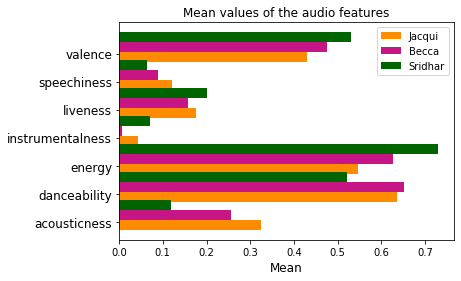

In [8]:
# Create bar chart to compare everyone's audio features
# Number of features
N = len(yourname_features.mean())
# Array with the number of features
ind = np.arange(N) 

width = 0.35  
#Bar plot with my list
plt.barh(ind, yourname_features.mean() , width, label='yourname', color = 'darkorange')
#Bar plot with her list
plt.barh(ind + width, name2_features.mean(), width, label='name2', color = 'mediumvioletred')
#bar plot name3
plt.barh(ind + width + width, name3_features.mean(), width, label='name3', color = 'darkgreen')

#X- label
plt.xlabel('Mean', fontsize = 12)
# Title
plt.title('Mean values of the audio features')
#Vertical ticks
plt.yticks(ind + width  / 3, (list(name2_features)[:]), fontsize = 12)
#legend
plt.legend(loc='best')
# Figure size
plt.rcParams['figure.figsize'] =(10,10)
# Set style
style.use("ggplot")

plt.show()



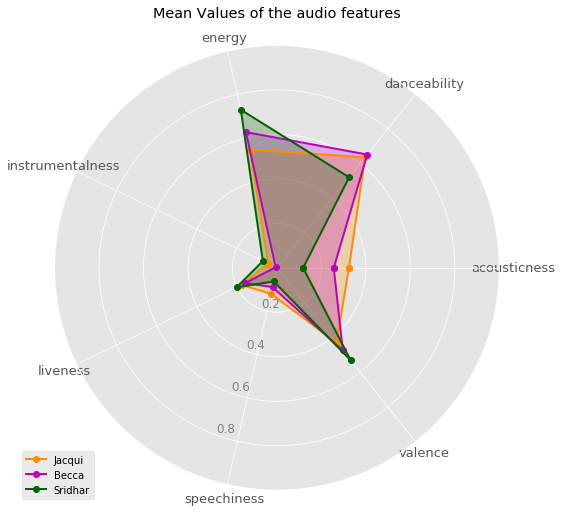

In [282]:
# create radial chart to compare everyone's audio features
labels= list(yourname_features)[:]
stats= yourname_features.mean().tolist()
stats2 = name2_features.mean().tolist()
stats3 = name3_features.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
stats3 = np.concatenate((stats3,[stats3[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "yourname", color= 'darkorange')
ax.fill(angles, stats, alpha=0.25, facecolor='darkorange')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "name2", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features')
ax.grid(True)

ax.plot(angles, stats3, 'o-', linewidth=2, label = "name3", color= 'darkgreen')
ax.fill(angles, stats3, alpha=0.25, facecolor='darkgreen')


plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))




## Audio comparison between two people

This section compares the features of two people at a time. Many of the visualizations are credited to [this article](https://towardsdatascience.com/a-music-taste-analysis-using-spotify-api-and-python-e52d186db5fc). This can help us determine where two individual people differ the most. The visualizations below measure the numeric difference between two people's features for each feature. If the bar is above the middle line, it means that person had higher values for those features. Similarly, if the bar is below the middle line, it means that the person had lower values for those features.

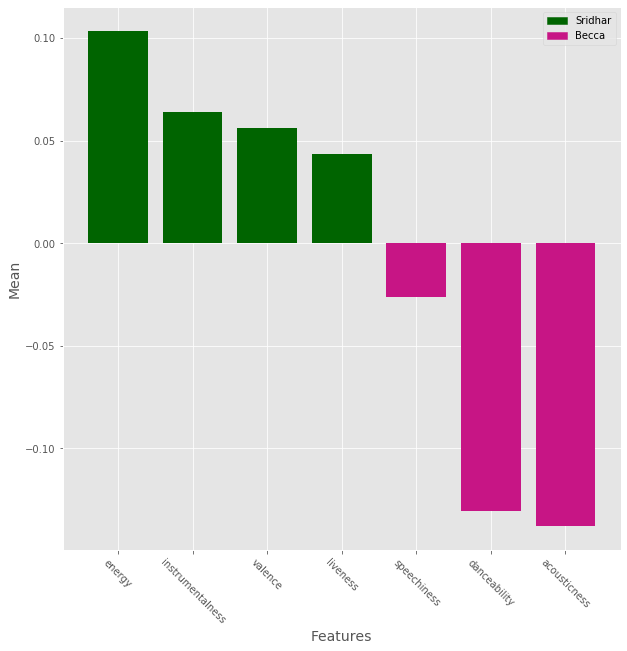

In [59]:
# Compare person 2 and person 3's audio features.
# the features on the outer part of the visualization are where the two differ the most
# features in the middle are where the two are the most similar
# Create 
colors = ['darkgreen','darkgreen','darkgreen',
          'darkgreen','mediumvioletred','mediumvioletred','mediumvioletred']
dif_features = name3_features.mean() - name2_features.mean()

index = dif_features.sort_values(ascending = False).index

#Plot
fig, ax = plt.subplots()
x = np.arange(dif_features.count())
y = dif_features.sort_values(ascending = False)
plt.bar(x,y, color = colors)
plt.xticks(x, (yourname_features.columns))
ax.set_xticklabels(index, rotation=-45)



#Create Legend
import matplotlib.patches as mpatches
gray_patch = mpatches.Patch(color ='darkgreen', label = 'name3')
violet_patch = mpatches.Patch(color = 'mediumvioletred', label = 'name2')
plt.legend(handles = [gray_patch,violet_patch], loc = 'upper right')

#labels
plt.ylabel('Mean', fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.show()

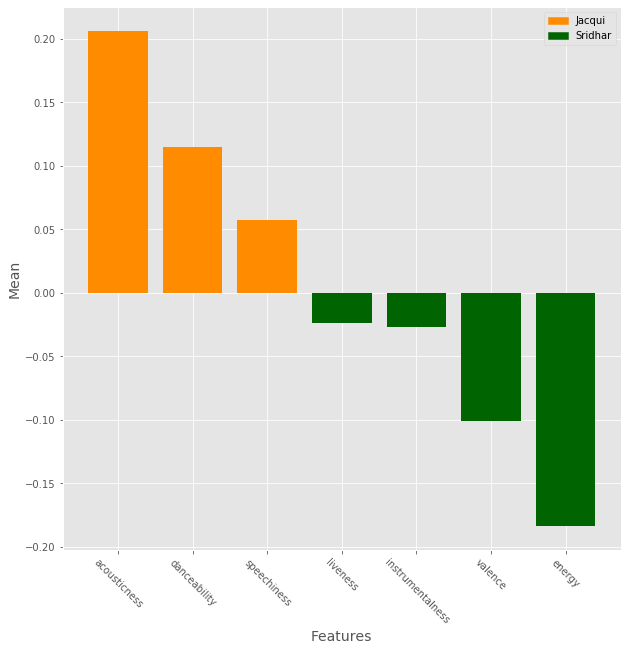

In [62]:
# Compare person 1 and person 3's audio features.
# the features on the outer part of the visualization are where the two differ the most
# features in the middle are where the two are the most similar
colors = ['darkorange','darkorange','darkorange',
          'darkgreen','darkgreen','darkgreen','darkgreen']
dif_features = yourname_features.mean() - name3_features.mean()

index = dif_features.sort_values(ascending = False).index

#Plot
fig, ax = plt.subplots()
x = np.arange(dif_features.count())
y = dif_features.sort_values(ascending = False)
plt.bar(x,y, color = colors)
plt.xticks(x, (yourname_features.columns))
ax.set_xticklabels(index, rotation=-45)



#Create Legend
import matplotlib.patches as mpatches
gray_patch = mpatches.Patch(color ='darkorange', label = 'yourname')
violet_patch = mpatches.Patch(color = 'darkgreen', label = 'name3')
plt.legend(handles = [gray_patch,violet_patch], loc = 'upper right')

#labels
plt.ylabel('Mean', fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.show()

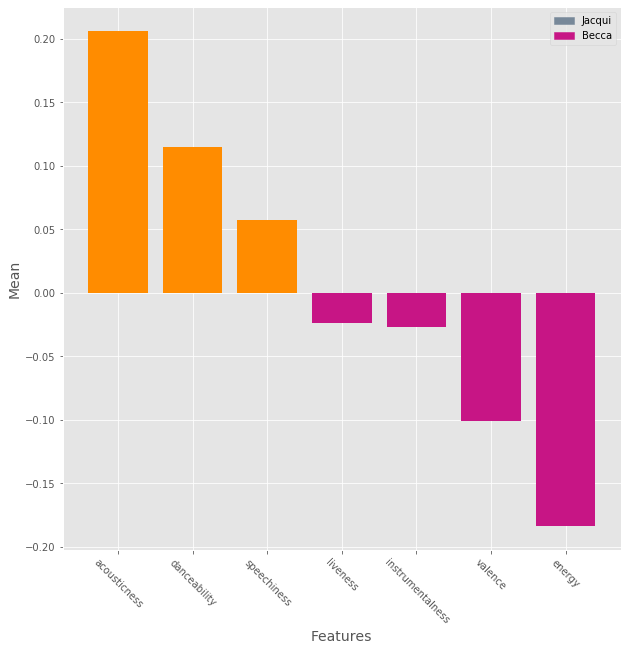

In [64]:
# Compare person 1 and person 2's audio features.
# the features on the outer part of the visualization are where the two differ the most
# features in the middle are where the two are the most similar
colors = ['darkorange','darkorange','darkorange',
          'mediumvioletred','mediumvioletred','mediumvioletred','mediumvioletred']
dif_features = yourname_features.mean() - name3_features.mean()

index = dif_features.sort_values(ascending = False).index

#Plot
fig, ax = plt.subplots()
x = np.arange(dif_features.count())
y = dif_features.sort_values(ascending = False)
plt.bar(x,y, color = colors)
plt.xticks(x, (yourname_features.columns))
ax.set_xticklabels(index, rotation=-45)



#Create Legend
import matplotlib.patches as mpatches
gray_patch = mpatches.Patch(color ='lightslategray', label = 'yourname')
violet_patch = mpatches.Patch(color = 'mediumvioletred', label = 'name2')
plt.legend(handles = [gray_patch,violet_patch], loc = 'upper right')

#labels
plt.ylabel('Mean', fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.show()

## Individual audio correlations
This section looks at each individual person's own correlation heatmap of the audio features. Here, we are trying to see if there are relationships among the various features, which we had initially expected. Upon further inspection, the relationships do not seem to be as strong as we had originally thought. For example, we believed that speechiness and instrumentalness would be highly negatively correlated, as more instrumental songs would have less words. However, we found that there was little correlation, meaning that maybe our understanding of how Spotify calculates these features is not the same as what we've assumed

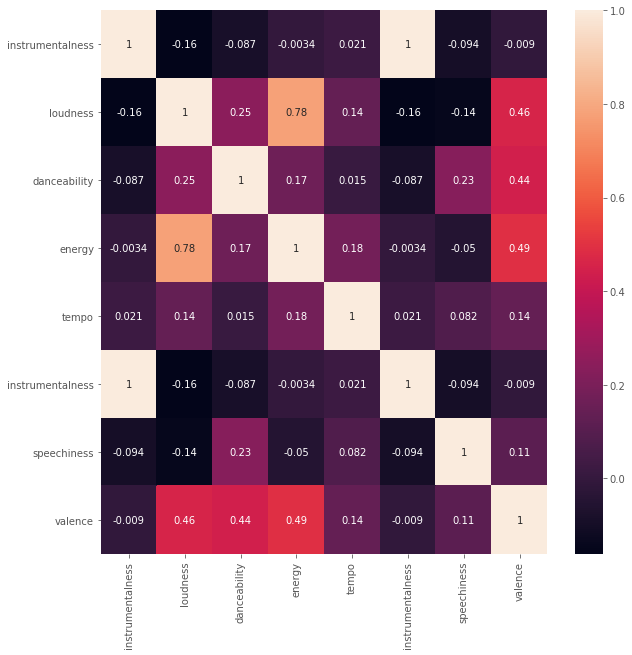

In [65]:
# plot person 1's correlation heatmap
f = (
    yourname.loc[:, ['instrumentalness','loudness','danceability','energy','tempo','instrumentalness',
                      'speechiness','valence']]
        #.applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
).corr()

sns.heatmap(f, annot=True)

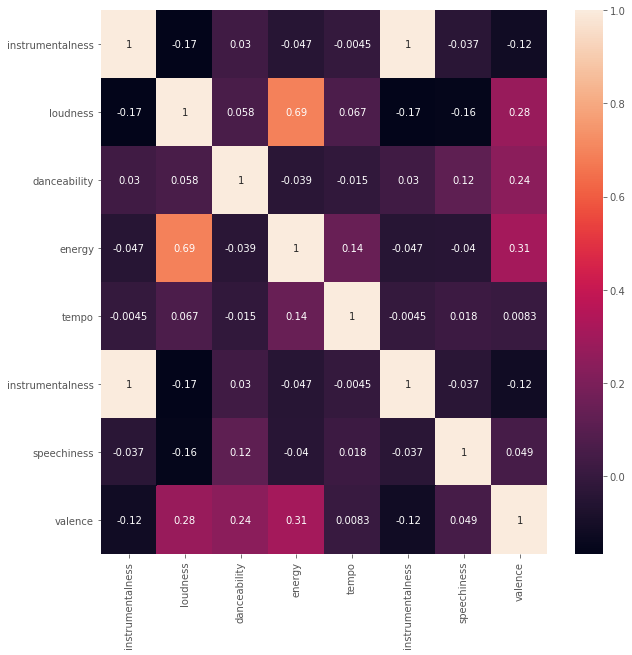

In [66]:
# plot person 2's correlation heatmap
f = (
    name2.loc[:, ['instrumentalness','loudness','danceability','energy','tempo','instrumentalness',
                      'speechiness','valence']]
        #.applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
).corr()

sns.heatmap(f, annot=True)

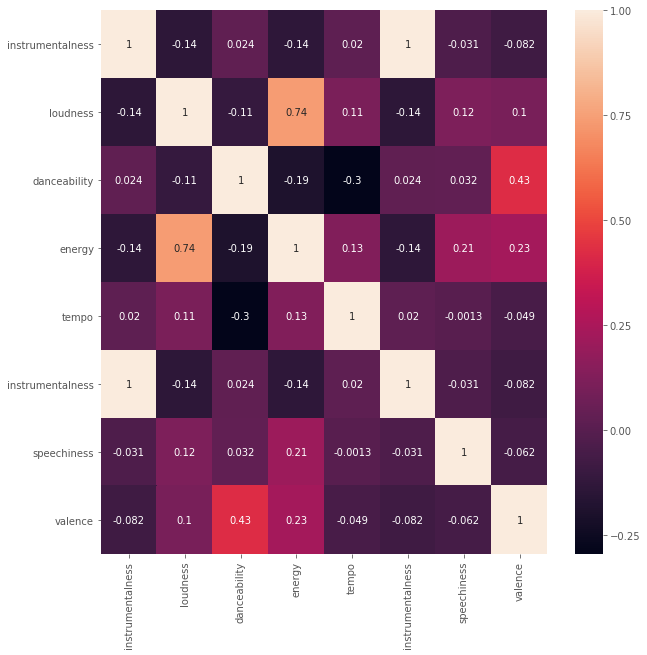

In [67]:
# plot person 3's correlation heatmap
f = (
    name3.loc[:, ['instrumentalness','loudness','danceability','energy','tempo','instrumentalness',
                      'speechiness','valence']]
        #.applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
).corr()

sns.heatmap(f, annot=True)

## Dive into individual audio features
In this section, we dive into the features in which we differ the most, as discovered from above. We also analyze a few other features, such as album release date, because this is a feature that we assumed we would differ in based on our own knowledge of our music tastes. 

No handles with labels found to put in legend.


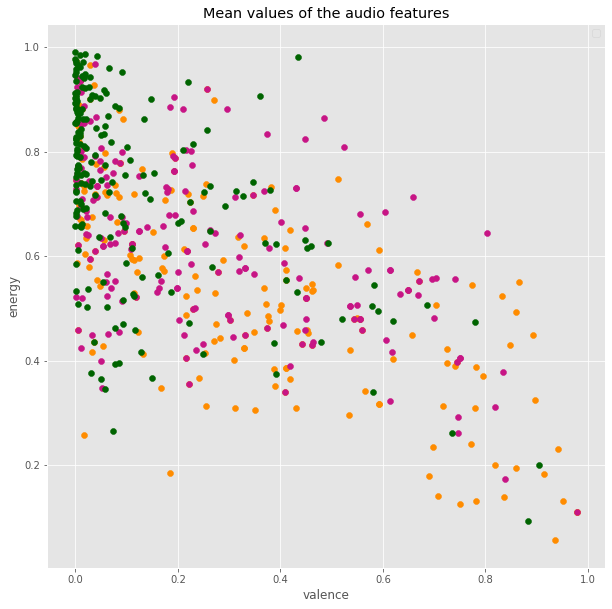

In [45]:
# plot energy against valence to see if there is a clear correlation or a pattern for everyone
# Number of features
N = len(yourname_features.mean())
# Array with the number of features
ind = np.arange(N) 

width = 0.35  
#Bar plot with my list
plt.scatter(yourname_features['acousticness'],yourname_features['energy'], c = 'darkorange')
#Bar plot with her list
plt.scatter(name2_features['acousticness'],name2_features['energy'], c = 'mediumvioletred')
# #bar plot name3
plt.scatter(name3_features['acousticness'],name3_features['energy'], c = 'darkgreen')

#X- label
plt.xlabel('valence', fontsize = 12)
plt.ylabel('energy', fontsize = 12)
# Title
plt.title('Mean values of the audio features')
#Vertical ticks
plt.np.arange(0, 1, step=0.2)
#legend
plt.legend(loc='best')
# Figure size
plt.rcParams['figure.figsize'] =(10,10)
# Set style
style.use("ggplot")

plt.show()

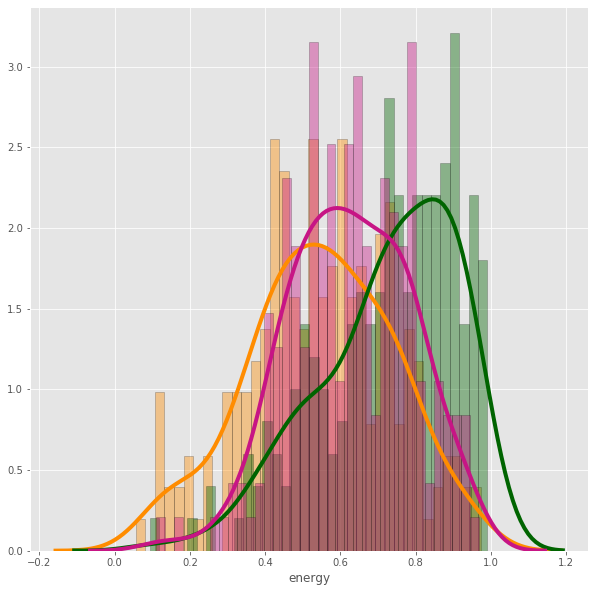

In [26]:
# Plot overlapping histograms for energy
sns.distplot(yourname_features['energy'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkorange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(name3_features['energy'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(name2_features['energy'], hist=True, kde=True, 
             bins=int(180/5), color = 'mediumvioletred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

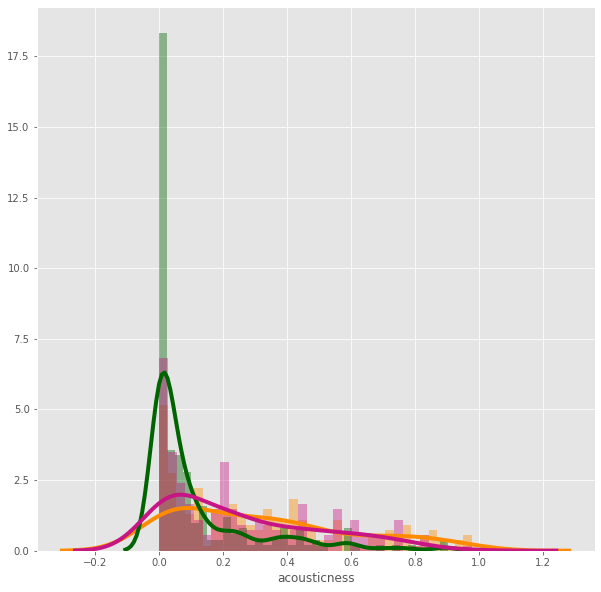

In [146]:
# plot overlapping histograms for acousticness
sns.distplot(yourname_features['acousticness'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkorange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(name3_features['acousticness'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(name2_features['acousticness'], hist=True, kde=True, 
             bins=int(180/5), color = 'mediumvioletred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

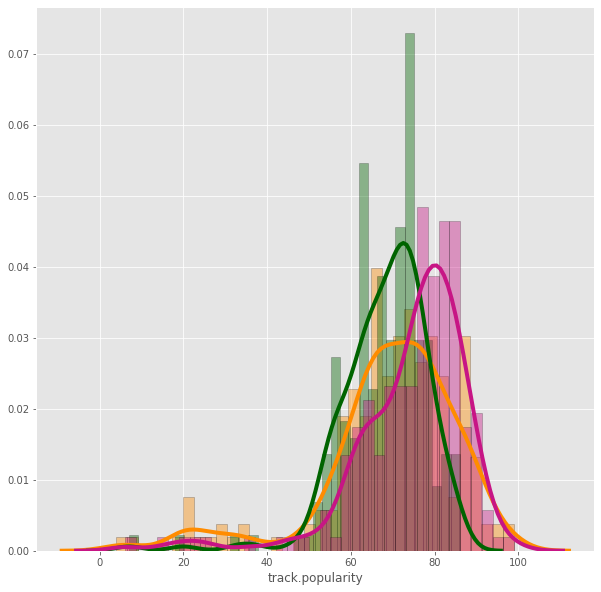

In [38]:
# plot overlapping histograms for song popularity (as defined by Spotify)
sns.distplot(yourname['track.popularity'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkorange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(name3['track.popularity'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(name2['track.popularity'], hist=True, kde=True, 
             bins=int(180/5), color = 'mediumvioletred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

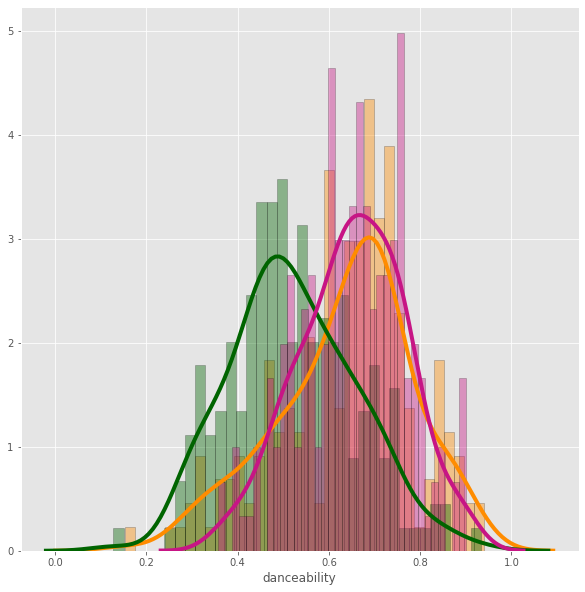

In [44]:
# plot overlapping histograms for danceability
sns.distplot(yourname['danceability'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkorange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(name3['danceability'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(name2['danceability'], hist=True, kde=True, 
             bins=int(180/5), color = 'mediumvioletred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

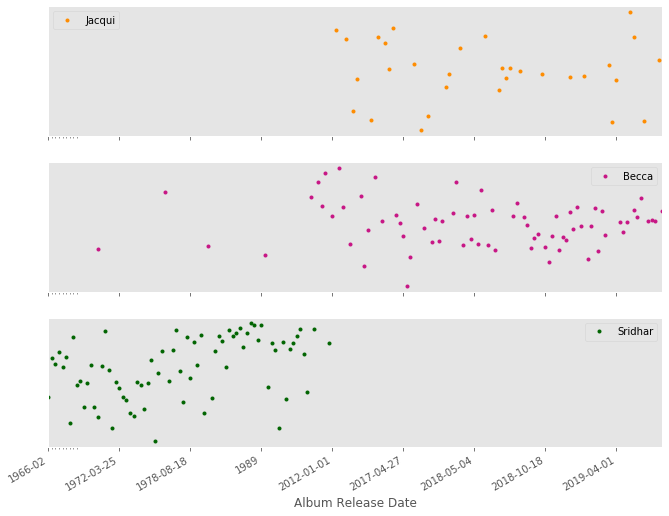

In [290]:
# plot each person's top 2019 songs by release date
everyone_top2019 = everyone[everyone['playlist']=='top_2019']

cols_plot = ['yourname', 'name2', 'name3']
test = pd.pivot_table(everyone_top2019[['username','energy','track.album.release_date']],columns='username',index='track.album.release_date')
test.columns = test.columns.droplevel(0)
axes = test[cols_plot].plot(marker='.', alpha=1, linestyle='None', figsize=(11, 9), subplots=True,
                            color=['darkorange','mediumvioletred','darkgreen'])
for ax in axes:
    ax.set_xlabel("Album Release Date")
    ax.set_xticks(np.arange(9),['1966-02-01','1972-03-25','1978-08-18','1989-01-01','2012-01-01',
                  '2017-04-27','2018-05-04','2018-10-18','2019-04-01'])
    ax.set_yticks([])

## Individual audio analysis
These parallel line charts for each individual allow us to see if there is a typical song "profile" that a person listens to. For example, if a person typically listens to the same type of songs, we expect the lines to all move in the same direction together since the song would have similar audio features values. Lines that are more scattered indicate a more diverse set of audio features.

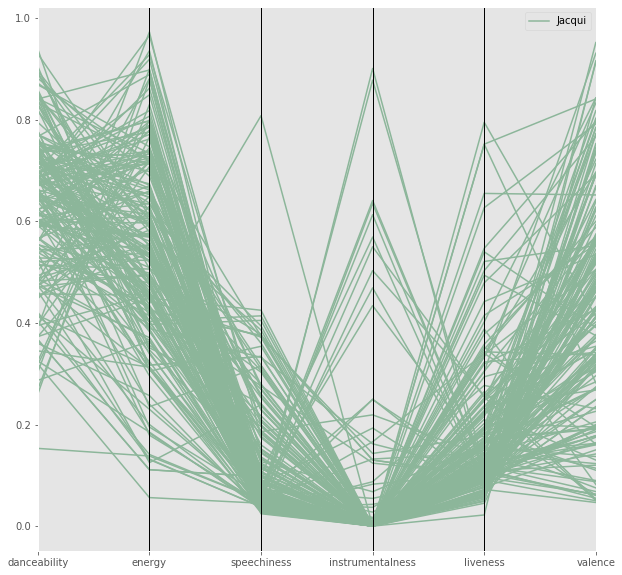

In [91]:
# create parallel coordinates visualization for person 1's audio features
f = (
    yourname.loc[:, ['danceability','energy','speechiness','instrumentalness','liveness','valence','username']]
)

parallel_coordinates(f,'username')

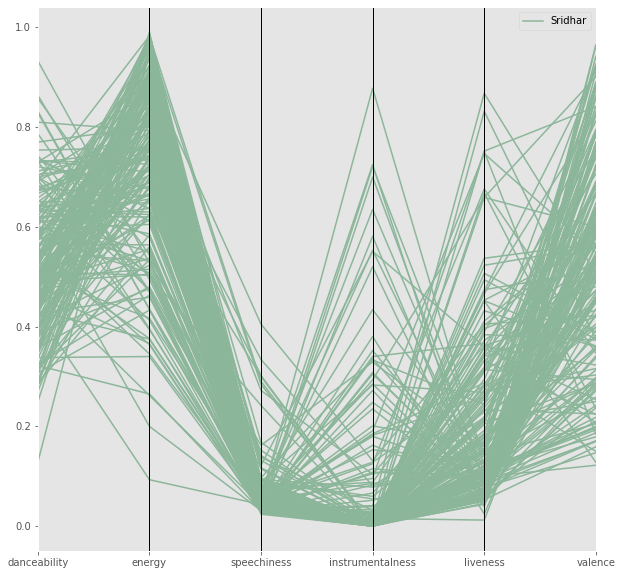

In [92]:
# create parallel coordinates visualization for person 3's audio features
f = (
    name3.loc[:, ['danceability','energy','speechiness','instrumentalness','liveness','valence','username']]
)

parallel_coordinates(f,'username')

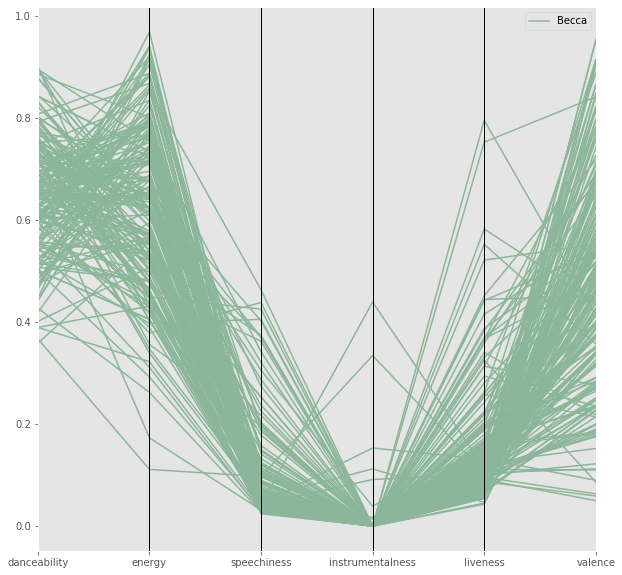

In [93]:
# create parallel coordinates visualization for person 2's audio features
f = (
    name2.loc[:, ['danceability','energy','speechiness','instrumentalness','liveness','valence','username']]
)

parallel_coordinates(f,'username')

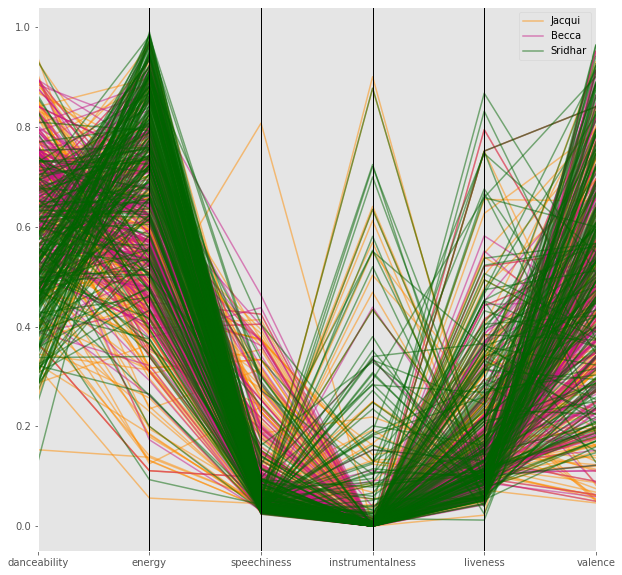

In [96]:
# overlap everyone's parallel coordinates to see if there are any clear differences
f = (
    everyone.loc[:, ['danceability','energy','speechiness','instrumentalness','liveness','valence','username']]
)

parallel_coordinates(f,class_column='username',color=['darkorange','mediumvioletred','darkgreen'])

## Color of individual Top 2019 playlists
Similar to the other module in this project, the Color of Playlists, we apply the same methodology to our individual Top 2019 playlists. These visualizations allow us to associate the features acousticness, energy, danceability to red, green, blue values, respectively. This means that the more acoustic a song is, the more red the color will be. We can then make unique colors for each song in our playlists, based on our features. In these visualizations, each square is a song.

In [183]:
# extract the features for the color of music visualization for each person's top2019 playlist
yourname_colors = yourname.loc[yourname['playlist']=='top_2019',['acousticness','energy','danceability']]
name2_colors = name2_colors.loc[name2['playlist']=='top_2019',['acousticness','energy','danceability']]
name3_colors = name3_colors.loc[name3['playlist']=='top_2019',['acousticness','energy','danceability']]

In [ ]:
# format the songs into a list of lists of the appropriate length for the visualization
# this helps format the songs for a nice grid visualization, with each cell as a song
# multiplying the rows and columns should give you the total songs in the playlist
def format_correctly(feature:list,row:int,col:int):
    n_start = 0
    n_end = col
    new_list = []
    for _ in range(row):
        a_list = feature[n_start:n_end]
        new_list.append(a_list)
        n_start += col
        n_end += col
    return new_list

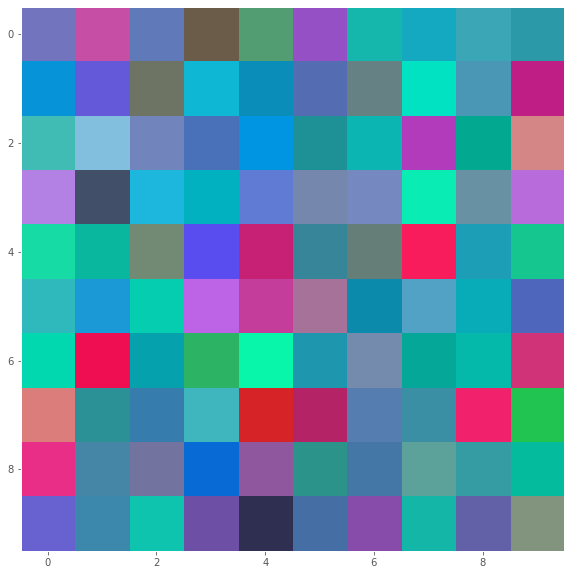

In [211]:
# create color of person 1's top 2019 playlist
formatted_features = [format_correctly(yourname_colors['acousticness'].tolist(),10,10),
                      format_correctly(yourname_colors['energy'].tolist(),10,10),
                      format_correctly(yourname_colors['danceability'].tolist(),10,10)]

ny, nx = 10, 10
r, g, b = formatted_features
plt.rcParams["axes.grid"] = False

c = np.dstack([r,g,b])

plt.imshow(c, interpolation='nearest')
plt.show()


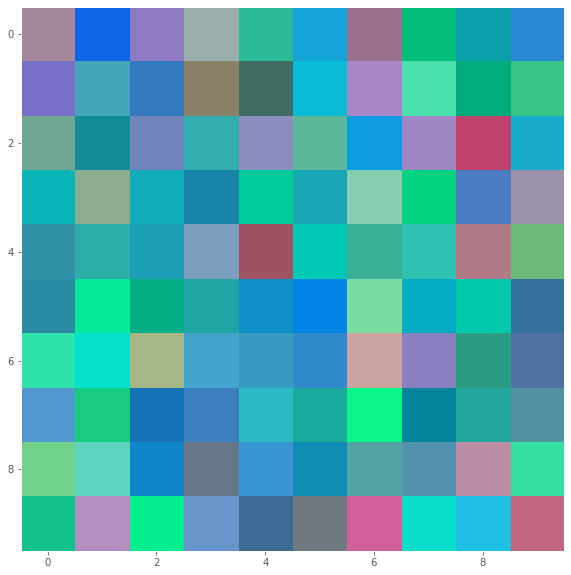

In [212]:
# create color of person 2's top 2019 playlist
formatted_features = [format_correctly(name2_colors['acousticness'].tolist(),10,10),
                      format_correctly(name2_colors['energy'].tolist(),10,10),
                      format_correctly(name2_colors['danceability'].tolist(),10,10)]

ny, nx = 10, 10
r, g, b = formatted_features
plt.rcParams["axes.grid"] = False

c = np.dstack([r,g,b])

plt.imshow(c, interpolation='nearest')
plt.show()


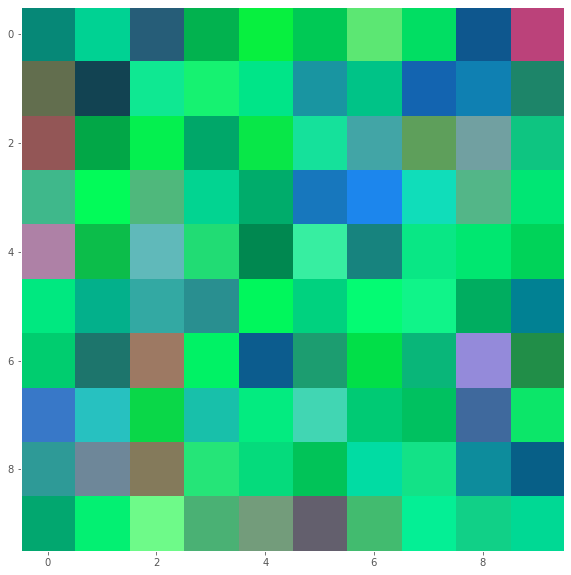

In [213]:
# create color of person 3's top 2019 playlist
formatted_features = [format_correctly(name3_colors['acousticness'].tolist(),10,10),
                      format_correctly(name3_colors['energy'].tolist(),10,10),
                      format_correctly(name3_colors['danceability'].tolist(),10,10)]

ny, nx = 10, 10
r, g, b = formatted_features
plt.rcParams["axes.grid"] = False

c = np.dstack([r,g,b])

plt.imshow(c, interpolation='nearest')
plt.show()


## Shared playlist visualizations
In this final section, we visualize the features of the final shared playlist that was created from our prediction module. We create the color of this playlist as well as a parallel coordinates chart. We can see that the color of our shared playlist is a nice blend of the predominant colors from our individual Top 2019 playlists.

In [219]:
# read in the data about our final shared playlist (from predictions module)
final_playlist = pd.read_csv('YOUR_FINAL_PLAYLIST')
len(final_playlist)

28

In [ ]:
# truncate the song names to fit in the visualization
def remove_par(songs:list,seps:str):
    new_songs=[]
    for song in songs:
        new_song = song.split(sep=seps)
        new_songs.append(new_song[0].strip())
    return new_songs

parsed_songs = remove_par(final_playlist['track.name'].tolist(),'(')
final_parsed_songs = remove_par(parsed_songs,'FEAT')

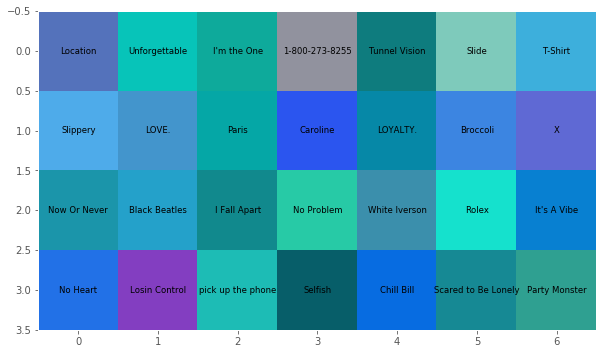

In [276]:
# create color of shared playlist with song titles
fig, ax = plt.subplots()

formatted_features = [format_correctly_final_playlist(final_playlist['acousticness'].tolist(),4,7),
                      format_correctly_final_playlist(final_playlist['energy'].tolist(),4,7),
                      format_correctly_final_playlist(final_playlist['danceability'].tolist(),4,7)]

ny, nx = 4, 7
r, g, b = formatted_features
plt.rcParams["axes.grid"] = False

c = np.dstack([r,g,b])

# plot the titles of the songs
n=0
for i in range(4):
    for j in range(7):
        text = ax.text(j, i, final_parsed_songs[n],
                       ha="center", va="center", color="black",wrap=True,fontsize=8.5)
        n+=1
        
plt.imshow(c, interpolation='nearest')
plt.show()

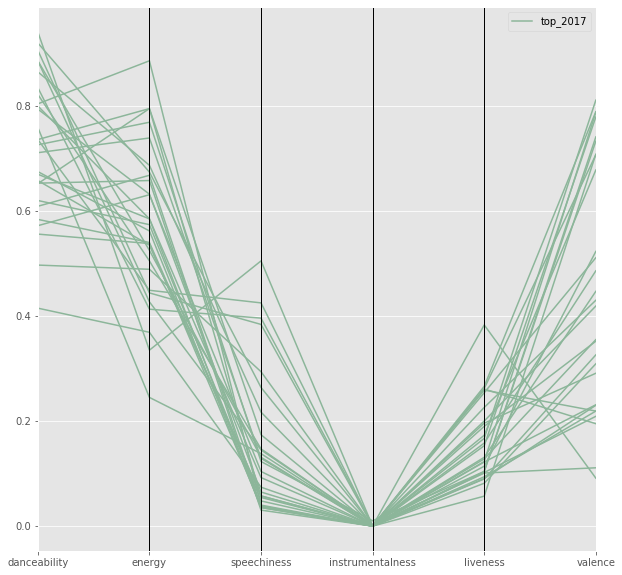

In [281]:
# create parallel coordinates plot for audio features of shared playlist
f = (
    final_playlist.loc[:, ['danceability','energy','speechiness','instrumentalness','liveness','valence','playlist']]
)

parallel_coordinates(f,'playlist')